# Problematic

#### For sociologists, to study the impact of stress and high-pressure environments on one’s health. They are looking for factors in people’s lives that could correlate to certain diseases or conditions. : 

They don't need to know any information about the identity of individuals. However, gender, dob and localisaiton  is really important information : 

- The id ( by name could be dropped (BE CARREFUL BECAUSE THIS INFORMATION COULD BE LINKED WITH THE SECOND PART OF THE EXERCICE)) 
- The gender could be replaced by 0 or 1 ( mais en vrai ca change pas grand chose)
- The dob : we don't need the day and the month of birth ==> Ne pourrait-on pas modifier grâce à une gaussienne de moyenne 0 sd 1 les dates de naissance ? On gagne en anonymisation, on ne perd pas grand chose 
- Zip code, we do not need the entire zipcode, we can keep only the first to digit.

==> Etant donnél'étude demandé, le risque n'est pas les identifiant mais les pseusos identifiants.

#### For the US department of Health and Human services chairman, to decide where to build new hospitals, and which departments (radiology, neurology, pulmonology, oncology...) to have in these, as the US federal government has just allocated money to build *5 new hospitals across the country* : 

A priori, je ne vois pas pourquoi on aurait besoin d'information sur les individus, ce qui nous importe est uniquement les maladies, la localicaiton, et pourquoi pas l'age des gens.

- Gender ne sert plus à rien
- l'année de naissance suffit 
- les deux premiers digit du zip code sont suffisant (étant donné que l'on va faire que 5 hopitauyx across the country)
- L'éducation on s'en branle
- Emploie on s'en fou
- Nombre d'enfant on s'en fou 
- Marital status on s'en branle
- ancestry on s'en fou 
- Nombre de véhicule ( est ce que ca peut être intéressant étant donné que c'est des hopitaux? ==> Ambulance tout ca)
- communte-time on s'en branle 
- accommodation on s'en fou 
- Maladie, pourrait on déjà regrouper les différentes maladies selon le service utilise à soigner les tiches ? On s'en branle de savoir si c'est un cancer du foie ou de la peau, ce qui est intéressant c'est qu'il faut un service d'oncologie



# Packages and data imports

## Import packages

In [295]:
#conda install -c conda-forge sklearn-pandas
import pandas as pd 
import os
import datetime as dt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.cluster import KMeans
import hashlib as h
from collections import Counter
import math


## Data import

In [296]:
data = pd.read_csv("../resources/dataset_HW3.csv")
states = pd.read_csv("../resources/states_cleaned.csv")
density_state = pd.read_csv('../resources/density_state.csv')

# ID anonymisation

In [297]:
def ID_anonymised_df(df, secret_key):
    new_id_vec = []
    for id in df['id']:
        id_salted = str(id.replace(' ', '')+secret_key)
        new_id_vec.append(h.sha3_256(id_salted.encode()).hexdigest())
    
    anonimsed_df = df.copy()
    anonimsed_df['id'] = new_id_vec

    return anonimsed_df


In [298]:
data_socio = ID_anonymised_df(data, 'arthurgeeraerd11751600')
data_hospi = ID_anonymised_df(data, 'simonadrienkinartlegendre')

# Transformations 

### Date of birth

In [299]:
"""# Projet hopitaux : on met les ages par dizaine d'année
for i in range(len(data_hospi["dob"])):

    # Modify DOB 
    s = 0 #np.random.normal(0, 2, 1)
    data_hospi.at[i,"dob"] = str(round(int(data_hospi["dob"][i][-4:]) +s, -1))[-2:]#[0])  # ARRONDI A LA DIZAINE
"""

# Projet sociologique : on met les ages avec une erreur suivant une normale. ++> PERMET EN PLUS DE DIFFERENCIER par rapport à l'autre BDD.

for i in range(len(data_socio["dob"])):
    # Modify DOB 
    #s = np.random.normal(0, 2, 1)
    s=0
    data_socio.at[i,"dob"] = str(round(int(data_hospi["dob"][i][-4:]) +s, -1))[-2:]#[0])  # ARRONDI A LA DIZAINE
    data_hospi.at[i,"dob"] = str(round(int(data_hospi["dob"][i][-4:]) +s, -1))[-2:]#[0])  # ARRONDI A LA DIZAINE

## Mapping Variable catégorielles

Chaque fonction permet de gérer une variable catégorielle. On mets en entrée la valeur que l'on veut pour chaque catégorie possible, 
en retour, la database est modifiée avec les catégorie que l'on veut.

Exemple : 

change_education(data, "low", "low", "middle", "high", "high") va remplacer dans la dataBase Lessthan high school par low, high school par low, chachelor par moiddle, et master et phd par high

### functions

In [300]:
def change_education(data, less, high, bach, master, phd):

    mapping_education = {
        'Less than High School':less,
        'High School':high,
        'Bachelor':bach,
        'Masters':master,
        'PhD/md':phd,
    }
    changed_data = data.copy()
    changed_data["education"] = data.education.map(mapping_education)
    return changed_data


def change_gender(data, male, female):

    mapping_gender = {
        'male': male,
        'female': female
    }

    
    changed_data = data.copy()
    changed_data["gender"] = data.gender.map(mapping_gender)
    return changed_data


def change_employment(data, employed, retired, student, unemployed):
    mapping_employment = {
        'Employed' : employed,
        'Retired' : retired,
        'Student' : student,
        'Unemployed' : unemployed
    }

    changed_data = data.copy()
    changed_data["employment"] = data.employment.map(mapping_employment)
    return changed_data


def change_children(data, zero, un, deux, trois, quatre , cinq, six, sept, huit):
    mapping_children = {
        0 : zero,
        1 : un,
        2 : deux,
        3 : trois,
        4 : quatre,
        5 : cinq,
        6 : six,
        7 : sept,
        8 : huit
    }

    changed_data = data.copy()
    changed_data["children"] = data.children.map(mapping_children)
    return changed_data



def change_marital_status(data, divorced, married, single, widowed):
    mapping_marital_status = {
        "divorced" : divorced,
        "married" : married,
        "single" : single,
        "widowed" : widowed,

    }

    changed_data = data.copy()
    changed_data["marital_status"] = data.marital_status.map(mapping_marital_status)
    return changed_data


def change_ancestry(data, Africa, Asia, Europe, North_America, Oceania, South_America):
    mapping_ancestry = {
        "Africa" : Africa,
        "Asia" : Asia,
        "Europe" : Europe,
        "North America" : North_America,
        "Oceania" : Oceania,
        "South America" : South_America

    }

    changed_data = data.copy()
    changed_data["ancestry"] = data.ancestry.map(mapping_ancestry)
    return changed_data


def change_number_vehicles(data, zero, un, deux, trois):
    mapping_nmbr_vehicule = {
        0 : zero,
        1 : un,
        2 : deux,
        3 : trois,

    }

    changed_data = data.copy()
    changed_data["number_vehicles"] = data.number_vehicles.map(mapping_nmbr_vehicule)
    return changed_data


def change_accommodation(data, Own_flat, Own_house, Rent_flat, Rent_house, Rent_room):
    mapping_accommodation = {
        "Own flat" : Own_flat,
        "Own house" : Own_house,
        "Rent flat" : Rent_flat,
        "Rent house" : Rent_house,
        "Rent room" : Rent_room,
        
    }

    changed_data = data.copy()
    changed_data["accommodation"] = data.accommodation.map(mapping_accommodation)
    return changed_data

# for the sake of the first use case we gather all specific diseases under more general health department 

def change_disease(data, gastritis, heart_disease, hypertension, diabetes, skin_cancer, prostate_cancer, breast_cancer, schizophrenia, Alzheimer, multiple_sclerosis, endometriosis, kidney_disease, HIV_AIDS):
    mapping_disease = {
        'gastritis': gastritis ,
        'heart disease': heart_disease,
        "hypertension": hypertension,
        "diabetes": diabetes,
        "skin cancer": skin_cancer,
        "prostate cancer":  prostate_cancer,
        "breast cancer": breast_cancer, 
        "schizophrenia": schizophrenia,
        "Alzheimer's disease": Alzheimer, 
        "multiple sclerosis": multiple_sclerosis,
        "endometriosis": endometriosis, 
        "kidney disease": kidney_disease,
        "HIV/AIDS": HIV_AIDS 
    }

    changed_data = data.copy()
    changed_data['disease'] = data.disease.map(mapping_disease)
    return changed_data


def change_date_of_birth(data,zero, trente, quarante, cinquante, soixante , septante, quatre_vinght, nonante) :

    mapping_dob = {
        "00" : zero,
        "30" : trente,
        "40" : quarante,
        "50" : cinquante,
        "60" : soixante,
        "70" : septante,
        "80" : quatre_vinght,
        "90" : nonante
        
    }

    changed_data = data.copy()
    changed_data["dob"] = data.dob.map(mapping_dob)
    return changed_data


### tests

In [301]:
# 'low' under highschool, 'high' elsewhere 
X1 = change_education(data, less= '0', high='0', bach='1', master='1', phd='1')

# '0' male, '1' female 
X2 = change_gender(X1,male = 0, female = 1)

# active = {employed, student} unactive = {retired, unemployed}
X3 = change_employment(X2, employed= '1', retired='0', student='1', unemployed='0')

# QUE FAIRE AVEC LES CHILDREN ?
X4 = change_children(X3, "none", "one",'more than one','more than one','more than one','more than one','more than one','more than one','more than one')

# married = married, unmarried = others
X5 = change_marital_status(X4, divorced='0', married='1', single='0', widowed='1')

# native : north america, foreigners : others BUT to much 'other' compare to native so might affect negatively l-diversity. Instead, we merge north/south america 
X6 = change_ancestry(X5, Africa='Africa', Asia='Asia', Europe='Europe', North_America='America', Oceania='Oceania', South_America='America')

# 1 if got vehicule, 0 else 
X7 = change_number_vehicles(X6, zero='none', un='one', deux='more than one', trois='more than one')

# owner = owner, renter = renter regardless of the type of the accomodaations (2/3 owner, maybe reset these proportion ? )
X8 = change_accommodation(X7, Own_flat='1', Own_house='1', Rent_flat= '0', Rent_house='0', Rent_room='0')

# gathered under medical departments
X9 =change_disease(X8, gastritis='gastro-enterolgy', heart_disease='cardiovascular', hypertension='cardiovascular', diabetes='endocrynology', 
    skin_cancer='oncology', prostate_cancer='oncology', breast_cancer='oncology', 
    schizophrenia='psychiatry', Alzheimer='neurology', multiple_sclerosis='neurology', endometriosis='gynecology', kidney_disease='nephrology', HIV_AIDS='interal mdeicine')

# 

## Gestion ZIPCODE

import d'un base de données trouvée sur le net : http://structnet.com/instructions/zip_min_max_by_state.html

### HOSPITAL CASE

In [302]:
dict_states = {}

for (i,state) in enumerate(states['State Name']):
    dict_states[state] = [states['Zip Min'].iloc[i,], states['Zip Max'].iloc[i,]]     

In [303]:
def change_zipcode_state(df, dic_state):
    dict_zip_to_state = {}
    new_df = df.copy()

    for i,zip in enumerate(df['zipcode']):
        found = False
        for state, r in list(dict_states.items()):
            if zip in range(int(r[0]), int(r[1])):
                dict_zip_to_state[zip] = state
                found = True
        if not found:
            dict_zip_to_state[zip] = 'unknown state'

    new_df['zipcode'] = df.zipcode.map(dict_zip_to_state)
    return new_df

On créé le dictionnaire qui pour chaque clé : 'nom_etat', fait correspondre la valuer [zip_min, zip_max]

### Transform ZipCode to Density

In [304]:
def data_where_ZC_is_density(data,density_state_data,binary_stat):
    """
    Args: 
    - data: dataset at stake
    - density_state_data: BDD with densities
    - binary_stat: STRING. 
        * "mean"
        * "median"
    Returns: new dataset with changed 
    """

    transformed_density = 0 # intialisation

    if binary_stat== "mean":
        transformed_density = density_state_data['Density'].mean()

    elif binary_stat == "median":
        transformed_density = density_state_data['Density'].median()
    else:
        raise ValueError("wrong 'binary_stat' argument. Need to be a string format")
    

    dict_state_density = {}

    for i,state in enumerate(density_state_data['State']):
        if density_state_data['Density'].iloc[i] >= transformed_density:
            dict_state_density[state] = 'High'
        else:
            dict_state_density[state] = 'Low'
    
    new_data = data.copy()

    new_data['zipcode'] = data.zipcode.map(dict_state_density)

    return new_data

# Metrics

## k-Anonymity

In [305]:
def check_k_anonymity(data, k, list_categorical_variable) : #k=2 --> 2 individus ne sont pas distingables via les quasi-identifiers
    """
    return: vector of boolean of length "number of groups", each value equal True if the group is composed of k individuals or more.
    """
    new_data = data.copy()

    group_by  = new_data[list_categorical_variable].groupby(list_categorical_variable)  
    rep = group_by[list_categorical_variable[0]].count() >= k
    #n_k_personnes = len(rep)-sum(rep) # if k =2 142 faux --> 142 personnes définies de façon unique
                                      # nombre de groupes dans lesquels il y a k personnes ou moins 

    return rep 

In [306]:
def check_k_anonymity(data, k, list_variable) :
    group_by  = data[list_variable].groupby(list_variable)
    is_k_anonym = group_by[list_variable[0]].count() >= k

    return is_k_anonym 

## L-Diversity

In [307]:
def check_L_diversity(data, k, list_categorical_variable, sensitive):
    """
    return : boolean vector of size number of groups, True if there is more than 1 disease represented in the group.
    """
    group_by = data.groupby(list_categorical_variable)[sensitive]
    L_diverse = group_by.nunique()>=k

    return L_diverse

## Entropy

In [308]:
def entropy(ds):
    ds = pd.DataFrame(ds)
    colNames = list(ds.columns)[1:-1] # remove index and disease
    counting_df = ds.groupby(colNames).size().reset_index(name='obs')
    n_class = list(counting_df['obs'])
    N = len(data)

    entropy = 0

    for n in n_class:
        entropy += -((int(n)/N) * math.log(int(n)/N))

    return entropy

In [309]:
from matplotlib import pyplot as plt

def plot_entropies(DB_list):
    entropies_list = [entropy(DB) for DB in DB_list]
    print(entropies_list)
    plt.plot(range(len(DB_list)), entropies_list)
    plt.title("Entropy variations")
    plt.ylabel("Entropy")
    plt.xlabel("Datasets index")
    plt.ylim(0,entropy(DB_list[0])+0.2)
    plt.show()

# Actual modifications

##  Sociology 

In [310]:
# 'low' under highschool, 'high' elsewhere 
zip_changed = change_zipcode_state(data_socio,dict_states)
density = data_where_ZC_is_density(zip_changed, density_state, "mean")
edu = change_education(density, less= '0', high='0', bach='1', master='1', phd='1')
gen = change_gender(edu,male = 0, female = 1)
employ = change_employment(gen, employed= '1', retired='0', student='1', unemployed='1')
child = change_children(employ, "none", "more than one",'more than one','more than one','more than one','more than one','more than one','more than one','more than one')
marital = change_marital_status(child, divorced='0', married='1', single='0', widowed='0')
ancestry = change_ancestry(marital, Africa='Autre', Asia='Autre', Europe='Occident', North_America='Occident', Oceania='Occident', South_America='Autre')
nmbrVec = change_number_vehicles(ancestry, zero='none', un='one', deux='one', trois='one')
accomo = change_accommodation(nmbrVec, Own_flat='1', Own_house='1', Rent_flat= '0', Rent_house='0', Rent_room='0')
year = change_date_of_birth(accomo, zero=0, trente=2, quarante=2, cinquante=2, soixante=2, septante=1, quatre_vinght=1, nonante=0)

# zero=0, trente=2, quarante=2, cinquante=2, soixante=2, septante=1, quatre_vinght=1, nonante=0)
# zero=8, trente=1, quarante=2, cinquante=3, soixante=4, septante=5, quatre_vinght=6, nonante=7)

for i in range(len(year["dob"])):

    if(year.at[i,"commute_time"]>=0.1) :
        year.at[i,"commute_time"] = "1"
    elif(year.at[i,"commute_time"]<0.1) :
        year.at[i,"commute_time"] = "0"

final_socio = year


[7.600902459541904, 7.600209312361344, 6.585179776887402, 6.565510031759848, 6.565510031759844, 6.562737443037605, 6.539248612900282, 6.5206118130268775, 6.404810982272541, 6.308689342058337, 6.1176822639895585, 5.330332552495124]


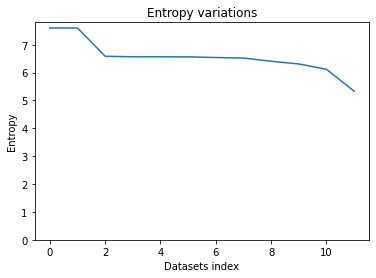

In [311]:
DB_list_socio = [data,zip_changed,density, edu, gen, employ, child, marital, ancestry, nmbrVec, accomo, year]

plot_entropies(DB_list_socio)

# Dropping of observations

In [312]:
my_list = ["gender", "dob", "zipcode","education", "employment", 
                                    "children", "marital_status","number_vehicles","ancestry", "commute_time","accommodation"]

sensitive_column = "disease"
group_by  = final_socio[my_list].groupby(my_list)

#is_k_anonym = group_by[my_list].count()


group_by[my_list[0]].count()

#is_k_anonym.filter(lambda g : g.count()<=1).index

gbqi = final_socio[my_list+[sensitive_column]].groupby(my_list)
indexes_to_drop = gbqi.filter(lambda x:x[sensitive_column].nunique()==1).index


BASE ## final_socio  === 5.771538191183372 



On reprend ; Pour l'instant, on est le best avec "gender", "dob", "zipcode", "education", "employment", "children".

On a 3 catégories d'age, education avec less, low et bachelier = 0 et le reste 1, et 3 catégories d'enfant. C'est le meilleur avec 14 individus solo, et une entropie de 5.666971147264563.

Marital statut fou la merde et fait passer à 41 le nombre d'individus solos. Important de noté que l'entropie est meilleure en considérant widow comme 0. ( Pourquoi pas le supprimer ???) Mais en revanche, refaire passer le nombre d'enfant à 2 catégories, refait passer l'entropie à 5.488307171965709, mais on ne perd plus que 21 individus.

On monte à 55 individus avec hasVehicule, Mais 28 sans marital status, ou 25 sans children
Commute time : on monte à 79 avec 0,1h, mais 95 avec 0,3. Avec une entropie de 5,54


293




# Hospital 

In [318]:
# 'low' under highschool, 'high' elsewhere 
zip_changed = change_zipcode_state(data_hospi,dict_states)
child = change_children(zip_changed, "none", "more than one",'more than one','more than one','more than one','more than one','more than one','more than one','more than one')
gen = change_gender(child,male = 0, female = 1)
nmbrVec = change_number_vehicles(gen, zero='none', un='one', deux='one', trois='one')
employ = change_employment(nmbrVec, employed= '1', retired='0', student='1', unemployed='0')
edu = change_education(employ, less= '0', high='0', bach='1', master='1', phd='1')
disease = change_disease(edu, gastritis='gastro-enterolgy', heart_disease='cardiovascular', hypertension='cardiovascular', diabetes='endocrynology', 
    skin_cancer='oncology', prostate_cancer='oncology', breast_cancer='oncology', 
    schizophrenia='psychiatry', Alzheimer='neurology', multiple_sclerosis='neurology', endometriosis='gynecology', kidney_disease='nephrology', HIV_AIDS='interal mdeicine')

year = change_date_of_birth(disease, zero=1, trente=0, quarante=0, cinquante=0, soixante=0, septante=1, quatre_vinght=1, nonante=1)

# zero=0, trente=2, quarante=2, cinquante=2, soixante=2, septante=1, quatre_vinght=1, nonante=0)
# zero=8, trente=1, quarante=2, cinquante=3, soixante=4, septante=5, quatre_vinght=6, nonante=7)

final_hospi = year


7.597436723639105


[7.600902459541904, 7.600209312361344, 7.599516165180785, 7.599516165180784, 7.597436723639105, 7.596743576458546, 7.592584693375187, 7.592584693375187, 7.576642308222316]


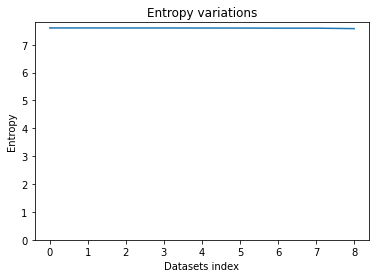

In [314]:
DB_list_hospi= [data,zip_changed,child, gen, nmbrVec, employ, edu, disease, year]

plot_entropies(DB_list_hospi)

In [315]:
#'education', 'employment'
rep = check_k_anonymity(final_socio, 2, ["dob", "zipcode","number_vehicles", "children", "employment" ])

print(rep)
print(len(rep)-sum(rep))

dob  zipcode  number_vehicles  children       employment
0    High     none             more than one  1              True
                               none           1              True
              one              more than one  1              True
                               none           1              True
     Low      none             more than one  1              True
                               none           1              True
              one              more than one  1              True
                               none           1              True
1    High     none             more than one  1              True
                               none           1              True
              one              more than one  1              True
                               none           1              True
     Low      none             more than one  1              True
                               none           1              True
              one  

On a une entropy de 7.576642308222318

En ajoutant children, on part en couille avec 2 personnes reconnaissables

In [316]:
final_hospi

,id,gender,dob,zipcode,education,employment,children,marital_status,ancestry,number_vehicles,commute_time,accommodation,disease
0,e8799603521c0b2c53717c48fdb0138b0d388b2c1a85ab...,1,0,unknown state,0,0,more than one,married,Africa,one,0.0,Own house,neurology
1,fb0becfbbca04c5205036b2ceaffb1a2bab789ca0248a0...,1,0,Texas,1,0,more than one,married,Africa,one,0.0,Rent flat,neurology
2,7af7aa616d336fad0a6a8d44ba79b387be192048b1dc0e...,1,1,Iowa,1,1,more than one,married,Asia,none,0.1,Rent flat,cardiovascular
3,522f6731e80a3aa6b5f65c1d2d82366cae678ac862c86e...,1,0,Wisconsin,1,0,more than one,married,Africa,none,0.0,Rent room,gynecology
4,fea388953b1f5bf791c207cddfdb2ba179a02e7507f541...,1,0,Nebraska,0,0,more than one,married,Europe,none,0.0,Rent flat,gastro-enterolgy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,114ba144162b33e4317efa98ccb52705ef422189b42bf7...,0,1,Louisiana,0,1,none,divorced,Europe,none,1.1,Rent house,gastro-enterolgy
1996,d6826d1b204f29fe5f0ec74fdc27f2bfd35feee4478420...,0,1,Michigan,0,1,none,single,North America,none,0.1,Rent house,gastro-enterolgy
1997,67ebd049b81975994b9d30a6e10887a90caa1762054ad0...,1,0,California,1,0,more than one,married,Africa,one,0.0,Own house,oncology
1998,a132bf2adfeadb7102840af3f73e914d469f54cadb2165...,0,1,Kentucky,0,1,more than one,married,Asia,one,0.0,Own flat,endocrynology


In [317]:
print(data_age["dob"].describe())

NameError: name 'data_age' is not defined